In [3]:
%matplotlib widget

# Gráfica de Smith completa

## Primer Ecuación:
$$\left(x-\frac{\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]}{\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]+1}\right)^{2}+y^{2}=\frac{1}{\left(\left[0,\frac{1}{3},1,3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7}\right]+1\right)^{2}}$$

## Segunda Ecuación:
$$\left(x-1\right)^{2}+\left(y-\frac{1}{\left[\frac{1}{3},1,3,-\frac{1}{3},-1,-3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7},-\frac{5}{3},-7,-\frac{3}{5},-\frac{1}{7}\right]}\right)^{2}=\frac{1}{\left(\left[\frac{1}{3},1,3,-\frac{1}{3},-1,-3,\frac{5}{3},7,\frac{3}{5},\frac{1}{7},-\frac{5}{3},-7,-\frac{3}{5},-\frac{1}{7}\right]\right)^{2}}\left\{x^{2}+y^{2}\le1\right\}$$

## Tercer Ecuación:
$$y=0\left\{x^{2}+y^{2}\le1\right\}$$

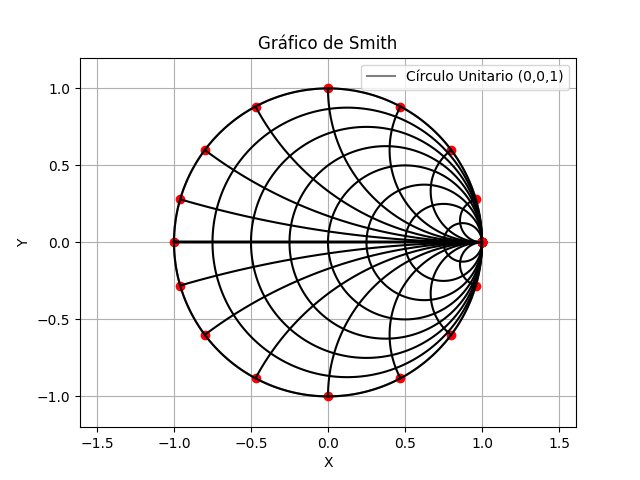

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, solve


# Lista de valores
valores = [0, 1/3, 1, 3, 5/3, 7, 3/5, 1/7]

# Definir la ecuación
def circle_equation(x, y, valores):
    return (x - valores / (valores + 1)) ** 2 + y ** 2 - 1 / (valores + 1) ** 2

# Crear una cuadrícula de valores para x e y
x = np.linspace(-1.2, 1.2, 1000)
y = np.linspace(-1.2, 1.2, 1000)
X, Y = np.meshgrid(x, y)

# Definir variables simbólicas
x, y = symbols('x y')

# Definir ecuaciones de los círculos
eq1 = x**2 + y**2 - 1

# Array de valores para los radios de los círculos
values = np.array([1/3, 1, 3, -1/3, -1, -3, 5/3, 7, 3/5, 1/7, -5/3, -7, -3/5, -1/7])

# Definir el primer círculo con centro en el origen y radio 1
r1 = 1
theta1 = np.linspace(0, 2*np.pi, 100)
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# Calcular intersección con la línea y=0
x_0 = np.sqrt(1)
y_0 = 0

# Graficar los puntos de intersección
plt.plot([x_0, -x_0], [y_0, y_0], 'ro')

# Graficar el círculo unitario
plt.plot(x1, y1, label='Círculo Unitario (0,0,1)',color='gray')

# Iterar sobre los valores y encontrar los puntos de intersección
for value in values:
    eq2 = (x - 1)**2 + (y - value)**2 - value**2
    try:
        intersections = solve((eq1, eq2), (x, y))
        intersection_points = [(float(intersection[0]), float(intersection[1])) for intersection in intersections if intersection]
        if not intersection_points:
            print(f"No se encontraron soluciones para el radio {value}.")
            continue
        
        # Extraer partes real e imaginaria de los puntos de intersección
        x_intersections_real = [point[0] for point in intersection_points]
        y_intersections_real = [point[1] for point in intersection_points]

        # Graficar puntos de intersección con parte imaginaria dentro del círculo unitario
        for x_inter, y_inter in intersection_points:
            if abs(y_inter) <= 1:  # Verificar si la parte imaginaria está dentro del círculo unitario
                plt.plot(x_inter, y_inter, 'ro')  # Graficar punto de intersección con parte imaginaria dentro del círculo unitario

        # Graficar la línea y=0 entre los puntos de intersección
        plt.plot([x_0, -x_0], [y_0, y_0],'k')
        # Graficar arco entre puntos de intersección
        if len(intersection_points) == 2:
            # Calcular ángulos de inicio y fin para trazar el arco
            angle1 = np.arctan2(y_intersections_real[0] - value, x_intersections_real[0] - 1)
            angle2 = np.arctan2(y_intersections_real[1] - value, x_intersections_real[1] - 1)
            # Ajustar los ángulos para que estén en el rango [0, 2*pi]
            if angle1 < 0:
                angle1 += 2*np.pi
            if angle2 < 0:
                angle2 += 2*np.pi
            theta = np.linspace(angle1, angle2, 100)
            x_arc = 1 + np.abs(value) * np.cos(theta)
            y_arc = value + np.abs(value) * np.sin(theta)
            plt.plot(x_arc, y_arc,'k')
    except Exception as e:
        print(f"Error al calcular las soluciones para el radio {value}: {e}")

# Graficar cada círculo individualmente
#plt.figure(figsize=(8, 8))
for valor in valores:
    Z = circle_equation(X, Y, valor)
    color = np.random.rand(3,)  # Genera un color aleatorio RGB
    #plt.contour(X, Y, Z, levels=[0], colors=[color])  # Usa el color aleatorio
    plt.contour(X, Y, Z, levels=[0],colors='k')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Smith')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()